# 0. Import and Functions

## 0.1 Import 

In [3]:
import inflection


import pandas  as pd 
import seaborn as sns 
import plotly  as plt 
import numpy   as np 

from IPython.core.display    import HTML 
from IPython.display         import Image
from scipy                   import stats


In [4]:
df_raw = pd.read_csv("datas/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 0.2 Functions

In [68]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
    
def count_plot_rot(colum, data, title):
    plt.figure(figsize=(15,6))
    ax =sns.countplot(x=colum, data=data);
    plt.xticks(rotation=90)
    ax.set_title(title, fontsize = 15)
    #ax.set_xlabel('‘df4’',fontsize = 15)
    ax.set_ylabel(colum,fontsize=15)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height)),ha='center')
        ax   
        
        
def calcCramerV(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))

In [6]:
jupyter_settings() 


Populating the interactive namespace from numpy and matplotlib


C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1. Data Describe

In [7]:
df1 = df_raw.copy()

In [8]:
df1.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 1.1 Rename Columns

Explicação das colunas: 
<br>

* Age - Idade                         
* Attrition - Saída                 
* BusinessTravel - Viagem a Trabalho
* DailyRate - Diária                    
* Department - Departamento                  
* DistanceFromHome - Distância de Casa        
* Education - Educação
* EducationField - Campo de Educação     
* EmployeeCount  -  Contagem de Empregados
* EmployeeNumber -  Número de Empregado             
* EnvironmentSatisfaction - Satisfação da Empresa
* Gender - Gênero
* HourlyRate - Horas de Trabalho             
* JobInvolvement - Participação do Trbalho  
* JobLevel - Nível do Empregado                   
* JobRole  - Cargo                   
* JobSatisfaction - Satisfação do Trabalho            
* MaritalStatus   - Estado Civil
* MonthlyIncome   - Renda Mensal            
* MonthlyRate     - Taxa Mensal            
* NumCompaniesWorked  -  Número de Ex Empresas      
* Over18   -  Mais de 18 anos                   
* OverTime  - Ao longo do tempo                  
* PercentSalaryHike   - Percentual de Salário      
* PerformanceRating  - Avaliação de Desempenho     
* RelationshipSatisfaction   - Satisfação de Relacionamento    
* StandardHours - Horas Padrão              
* StockOptionLevel - Level das Ações           
* TotalWorkingYears - Anos trabalhados            
* TrainingTimesLastYear - Horas de Treinamento Ano Passado  
* WorkLifeBalance       - Equilíbrio Entre vida Pessoal   
* YearsAtCompany        - Anos de Empresa      
* YearsInCurrentRole    - Anos no mesmo cargo 
* YearsSinceLastPromotion - Anos desde a última promoção    
* YearsWithCurrManager    - Anos com gerente atual

In [9]:
cols_old = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

## 1.2 Data Dimensions

In [10]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1470
Number of Cols: 35


## 1.3 Data Types

In [11]:
df1.dtypes

age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_count                 int64
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                 int64
monthly_rate                   int64
num_companies_worked           int64
over18                        object
over_time                     object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
standard_hours                 int64
s

## 1.5 Change DataTypes

In [12]:
df1["job_satisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: job_satisfaction, dtype: int64

In [13]:
df1["job_satisfaction1"] = df1["job_satisfaction"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")

df1["performance_rating1"] = df1["performance_rating"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")


df1["environment_satisfaction1"] = df1["environment_satisfaction"].apply(lambda x: "ruim"  if x == 1 else 
                                                       "regular" if x == 2 else 
                                                        "bom" if x == 3 else 
                                                        "excelente")


## 1.6 Descriptive Statistics

In [14]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

### 1.6.1 Numerical Atributes

In [15]:
num_attributes = num_attributes.drop(columns=['employee_number'], axis=1) 

describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0,42,0.247411,0.413286,-0.404145
daily_rate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0,1397,0.502824,-0.003519,-1.203823
distance_from_home,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0,28,0.881898,0.958118,-0.224833
education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0,4,0.351593,-0.289681,-0.559115
employee_count,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0,0,0.000000,0.000000,0.000000
environment_satisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0,3,0.401607,-0.321654,-1.202521
hourly_rate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0,70,0.308530,-0.032311,-1.196398
job_involvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0,3,0.260652,-0.498419,0.270999
job_level,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0,4,0.536322,1.025401,0.399152
job_satisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0,3,0.404184,-0.329672,-1.222193


* ANÁLISE 

**nenhum dos nossos dados são homogêneos. nenhum tem variation coefficient menor do que 15%**

age (idade): <br>
+ em média: 37 anos. Com skew positivo - concentração de dados para valores mais baixos. 

distancefromhome: <br> 
+ skew positiva, concentração para pessoas morando mais perto. Em média 9 km, um pouco longe. 


total_working_years: <br>
+ em média temos funcionários com 11 anos trabalhados número interessante


num_companies_worked: <br>
+ em média os colaboradores trabalharam em 3 empresas, porém o nosso coeficiente é muito alto isso demonstra uma alta variação de dados. 

stock_option_level: <br>
+ alta variação de dados 

### 1.6.2 Categorical Atributes

In [16]:
cat_attributes['job_satisfaction1'].value_counts(normalize=True) 

excelente    0.312245
bom          0.300680
ruim         0.196599
regular      0.190476
Name: job_satisfaction1, dtype: float64

In [17]:
cat_attributes['environment_satisfaction1'].value_counts(normalize=True) 

bom          0.308163
excelente    0.303401
regular      0.195238
ruim         0.193197
Name: environment_satisfaction1, dtype: float64

In [18]:
cat_attributes['performance_rating1'].value_counts() 

bom          1244
excelente     226
Name: performance_rating1, dtype: int64

In [19]:
cat_attributes['attrition'].value_counts(normalize = True) 

No     0.838776
Yes    0.161224
Name: attrition, dtype: float64

In [20]:
cat_attributes['business_travel'].value_counts(normalize=True) 

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: business_travel, dtype: float64

In [21]:
cat_attributes['department'].value_counts(normalize=True) 

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: department, dtype: float64

In [22]:
cat_attributes['education_field'].value_counts() 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: education_field, dtype: int64

In [23]:
cat_attributes['gender'].value_counts() 

Male      882
Female    588
Name: gender, dtype: int64

In [24]:
cat_attributes['marital_status'].value_counts() 

Married     673
Single      470
Divorced    327
Name: marital_status, dtype: int64

In [25]:
cat_attributes['job_role'].value_counts() 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: job_role, dtype: int64

**INTEPRETAÇÃO** 
* job_satisfaction1 - temos maior concentração em bom e excelente 
* performance_rating1 -  não temos dados diferentes de bom e excelente 
* department - Research & Development é o maior concentração de 65% da amostra 
* business_travel - quase 70% viajam raramente 
* attrition - só temos 16% dos colaboradores desligados 

# 2.Feature Engineering e Hipóteses

In [26]:
df2 = df1.copy()

## 2.1 Mapa Mental para Hipóteses 

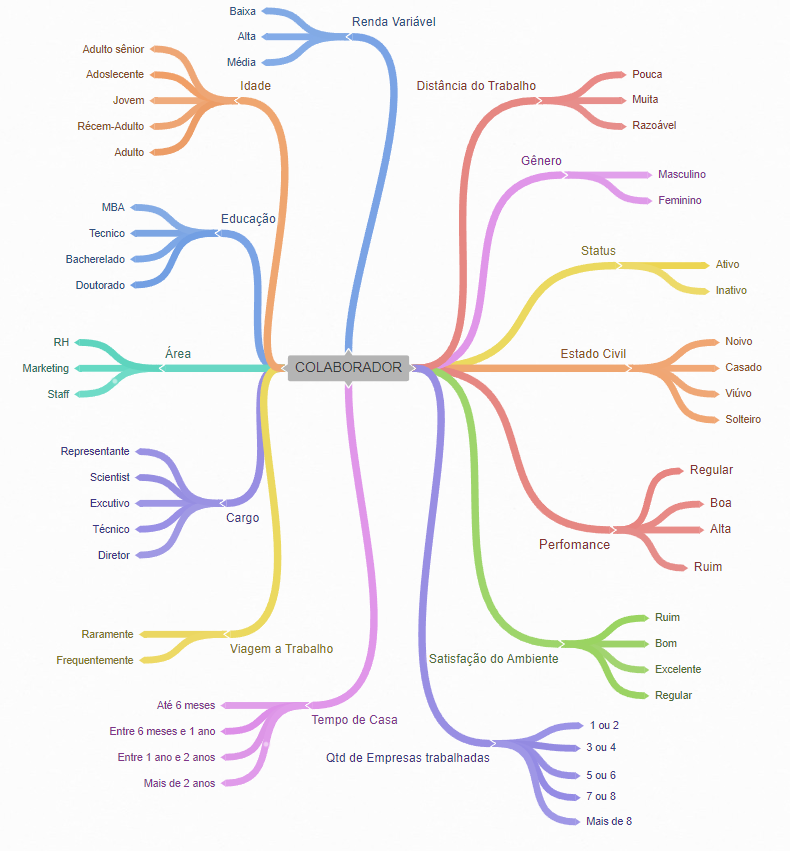

In [27]:
Image("datas/img.png") 

## 2.2 Criação das hipóteses

**IDADE**
1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores 
2. Colaboradores idosos ganham o dobro dos colaboradores mais jovens 

**TEMPO DE CASA**
1. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos 

**SATISFAÇÃO DO AMBIENTE**
1. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa
2. Colaboradores com satisfação Excelente ganham mais stop option na sua maioria 

**JOB SATISFACTION**
1. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa
2. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"

**EDUCAÇÃO**
1. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado 

**CARGO**
1. Mais do que 50% dos desligamentos são de Técnico 

**GÊNERO**
1. Mais do que 50% dos diretores são homens 
2. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos 

**QTD DE EMPRESAS TRABALHADAS**
1. Colaboradores que trabalharam em mais de 5 até 8 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 4. 

**PERFORMANCE**
1. Cargos executivo tem mais alta performance do que Técnicos 
2. Temos mais alta performance na empresa do que em desligados. 

**DISTÂNCIA DO TRABALHO**
1. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível. 

**STOCK OPTION**
1. Nossos maiores desligamentos estão em funções que tem pouca % de stock option


## 2.3 Lista final das hipóteses 

1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores
2. Colaboradores idosos ganham o dobro dos colaboradores mais jovens 
3. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos 
4. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa
5. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa
6. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"
7. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado
8. Mais do que 50% dos desligamentos são de Técnico
9. Mais do que 50% dos diretores são homens
10. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos 
11. Colaboradores que trabalharam em mais de 5 até 8 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 4. 
12. Cargos executivo tem mais alta performance do que Técnicos 
13. Temos mais alta performance na empresa do que em desligados
14. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível.
15. Nossos maiores desligamentos estão em funções que tem pouca % de stock option
16. Temos mais desligados em Staff do que em Marketing
17. Anos no mesmo cargo tem mais desligamentos do que colaboradores com menos anos 
18. Menos de 6 anos trabalhados tem mais desligamentos do que os com mais de 6 anos 

## 2.4 Feature Engineering

In [28]:
df2["age_range"] = df2["age"].apply(lambda x: "jovem" if x < 26 else 
                                              "adulto" if x < 45 else 
                                              "idoso")

df2["distance_range"]  = df2["distance_from_home"].apply(lambda x: "pouca" if x < 2 else 
                                                                   "media" if x < 7 else 
                                                                   "alta")

df2["empresas_range"] =  df2["num_companies_worked"].apply(lambda x: "1 - 3" if x < 4 else
                                                                     "4 - 7"  if x < 8 else
                                                                     "8 - 9")


df2["rv_range"] =  df2["stock_option_level"].apply(lambda x: "nao tem" if x ==  0 else
                                                              "pouca"  if x ==  1 else
                                                               "media" if x ==  2 else 
                                                               "alta")


# 3. Filtering Variables

In [29]:
df3 = df2.copy()

## 3.1 Filtering Lines

indiferente para nós 

## 3.2 Filetering Columns

In [30]:
df3 = df3.drop(columns=["employee_number","employee_count"], axis=1)

# 4. Exploratory Data Analysis

In [31]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Response Variable

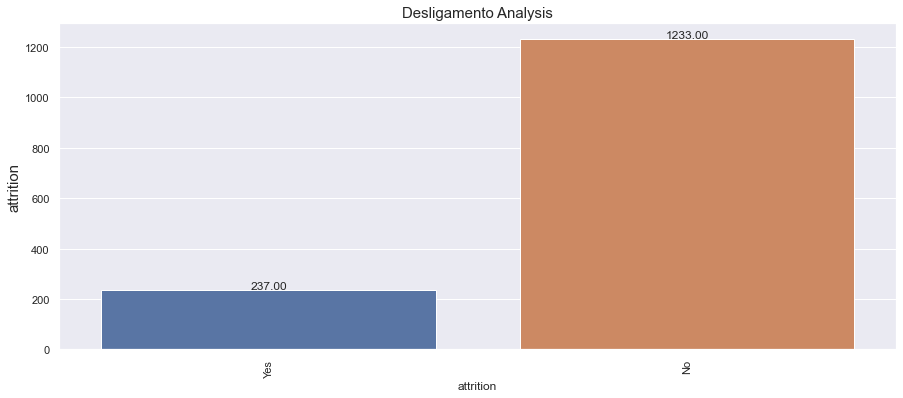

In [32]:
count_plot_rot("attrition", df4, "Desligamento Analysis")

Posso observar que a quantidade de Desligamento é quase 20% da quantidade de funcionários ativos. 

* Um número baixo, porém vale analisarmos e enetendermos a fundo onde está organizado esse desligamentos... 

### 4.1.2 Numerical Variables

ValueError: num must be 1 <= num <= 9, not 10

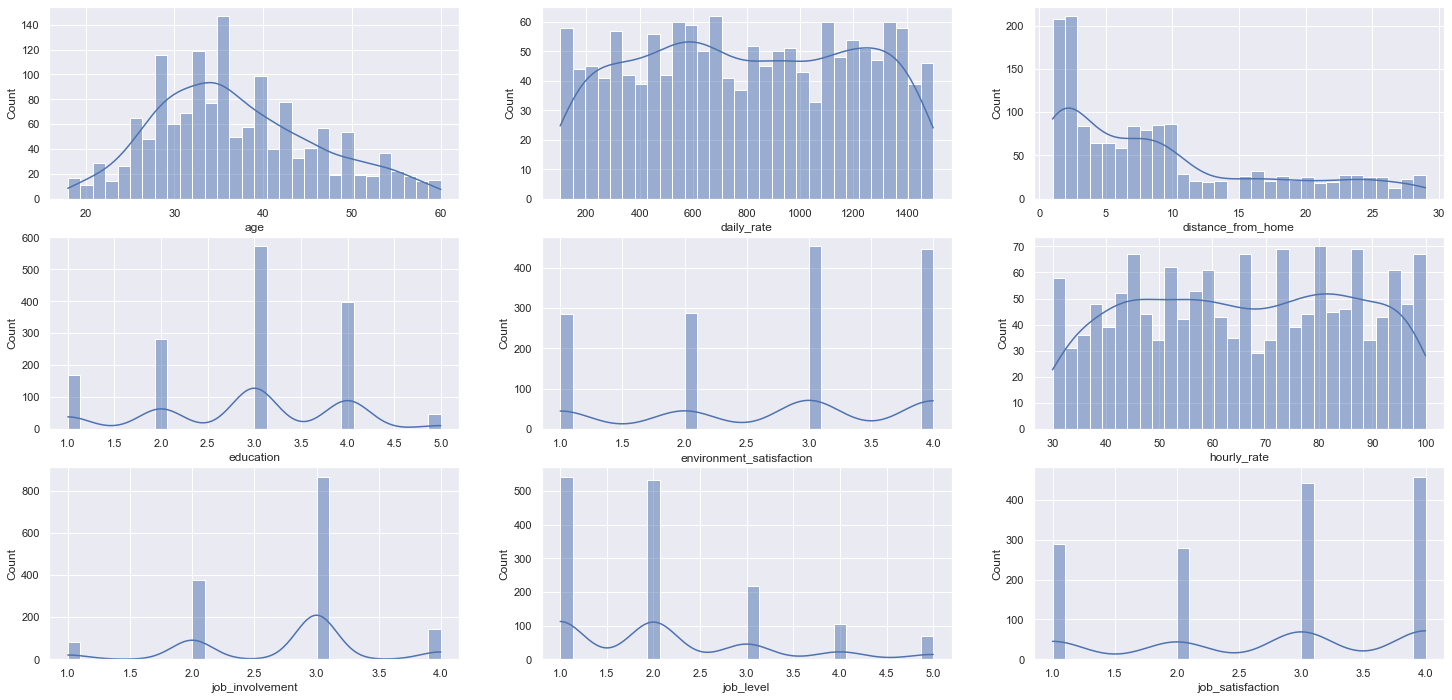

In [33]:
num_attributes = df4.select_dtypes(exclude='object')
columns = num_attributes.columns;
j = 1

for i in columns:
    plt.subplot(3, 3, j)
    sns.histplot(x=i, data=df4, kde=True, bins=30);
    
    j += 1

Job level segue uma pirâmide, tenho mais funcionários LV 1 depois LV 2 e assim vai até chegarmos no nível máximo 5.0

### 4.1.3 Categorical Variables

ValueError: num must be 1 <= num <= 9, not 10

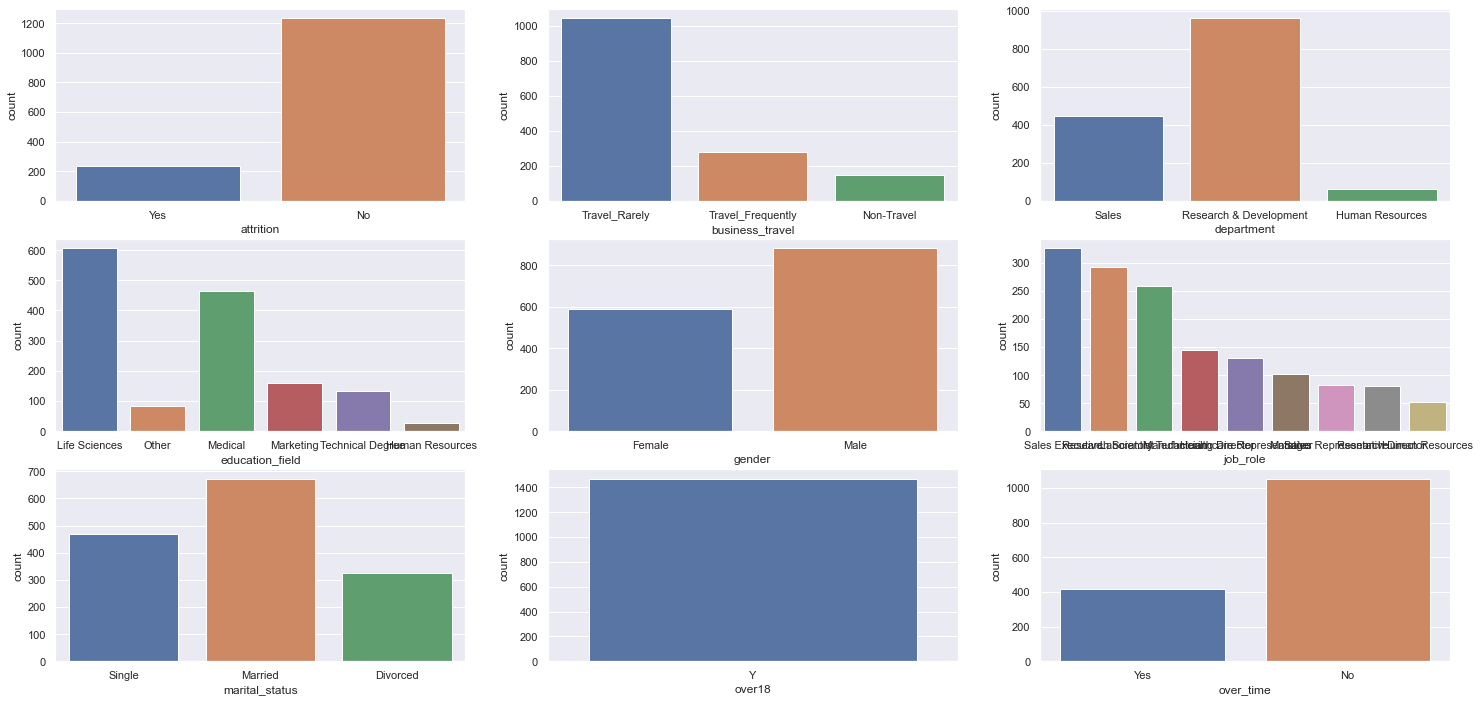

In [34]:
cat_attributes = df4.select_dtypes(include='object')
columns = ['attrition', 'business_travel', 'department', 'education_field',
       'gender', 'job_role', 'marital_status', 'over18', 'over_time',
       'job_satisfaction1', 'performance_rating1', 'environment_satisfaction1',
       'age_range', 'distance_range', 'empresas_range', 'rv_range']
j = 1

for i in columns:
    plt.subplot(3, 3, j)
    sns.countplot(x=i, data=df4);
    j += 1

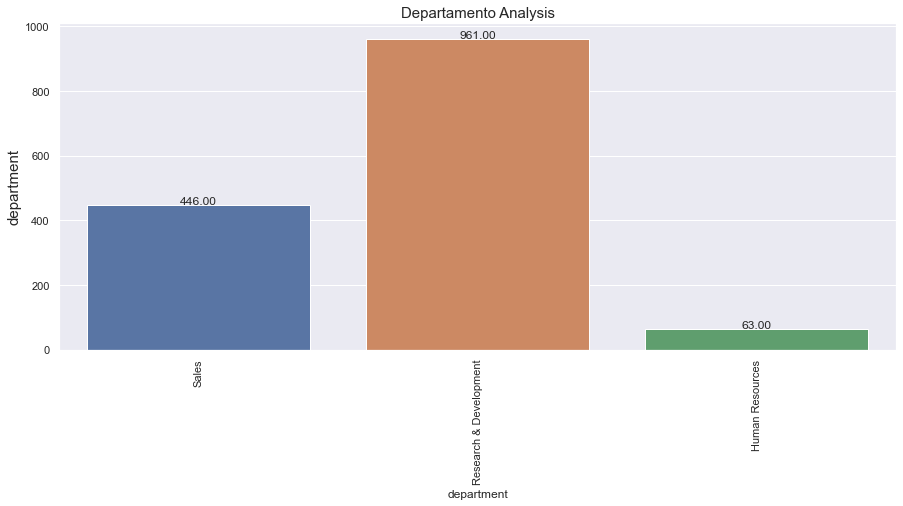

In [59]:
count_plot_rot("department", df4, "Departamento Analysis")

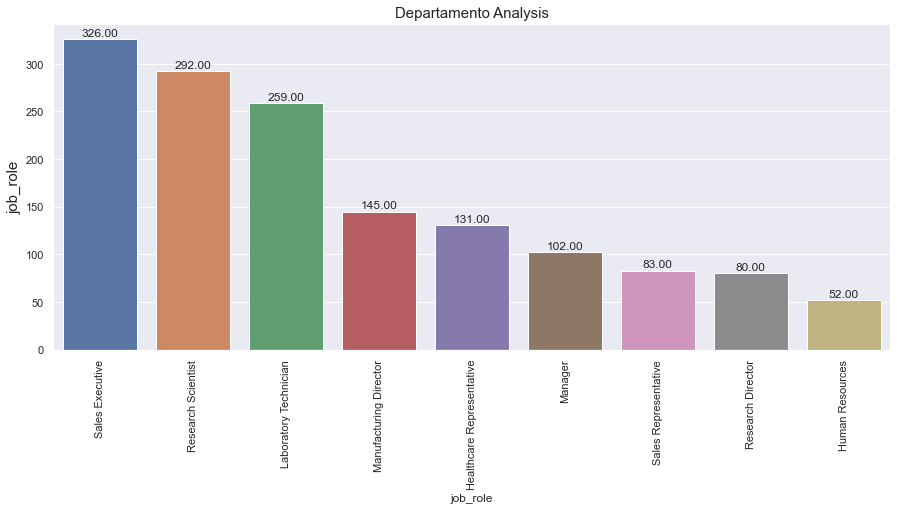

In [60]:
count_plot_rot("job_role", df4, "Departamento Analysis")

Os empregos com menor quantidade de funcionários é em "Human_Resources". Enquanto "Sales Executive" é onde mais temos empregados. Vale entendermos se esses funcionários estão ativos ou se trata de uma movimentação de mercado.

## 4.2 Bivariate Analysis

### Introduction to Hipoteses 

1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores
2. Colaboradores idosos ganham o dobro dos colaboradores mais jovens 
3. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos 
4. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa
5. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa
6. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"
7. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado
8. Mais do que 50% dos desligamentos são de Técnico
9. Mais do que 50% dos diretores são homens
10. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos 
11. Colaboradores que trabalharam em mais de 5 até 8 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 4. 
12. Cargos executivo tem mais alta performance do que Técnicos 
13. Temos mais alta performance na empresa do que em desligados
14. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível.
15. Nossos maiores desligamentos estão em funções que tem pouca % de stock option
16. Temos mais desligados em Staff do que em Marketing
17. Anos no mesmo cargo tem mais desligamentos do que colaboradores com menos anos 
18. Menos de 6 anos trabalhados tem mais desligamentos do que os com mais de 6 anos 

### H1. Colaboradores mais jovem tem mais chance de sair da empresa do que o restante dos colaboradores

**VERDADEIRO**

In [ ]:
sns.countplot(x="age_range", hue="attrition", data=df4);

### H2. Colaboradores idosos ganham mais do que dobro dos colaboradores mais jovens

**VERDADEIRO**

In [ ]:
idoso = df4[df4["age_range"]=="idoso"]
jovem = df4[df4["age_range"]=="jovem"]

idoso = idoso["monthly_income"].mean()
jovem = jovem["monthly_income"].mean()

print(f"Valor médio Idoso: {np.around(idoso, 2)}. Valor médio de salário dos Jovens: {np.around(jovem,2)} ")

**CONCLUSION**: Grande diferença, Hipótese real. Porém temos que analisar os cargos que ocupam os mais idosos e os mais jovens...  

### H3. Os desligamentos de até 6 meses são menores do que os desligamentos de mais de 2 anos

**INCONCLUSIVO - Só conseguimos analisar desligamentos por anos, não conseguimos analisar por mês!**

### H4. Colaboradores com satisfação de ambiente Ruim na sua maioria (50%>) saíram da empresa

**FALSO** A maioria dos que não estão satisfeitos com o ambiente estão ativos

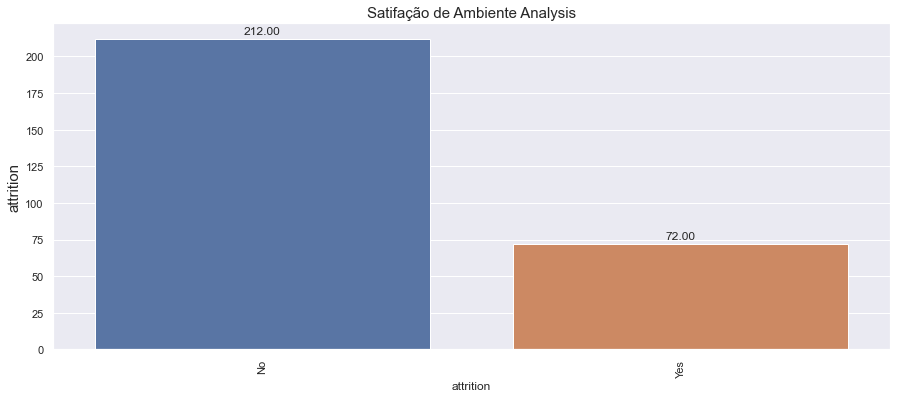

In [35]:
aux = df4[df4["environment_satisfaction1"]=="ruim"]
count_plot_rot("attrition", aux, "Satifação de Ambiente Analysis")

### H5. Colaboradores com satisfação de trabalho Ruim na sua maioria (50%>) saíram da empresa

**FALSO**

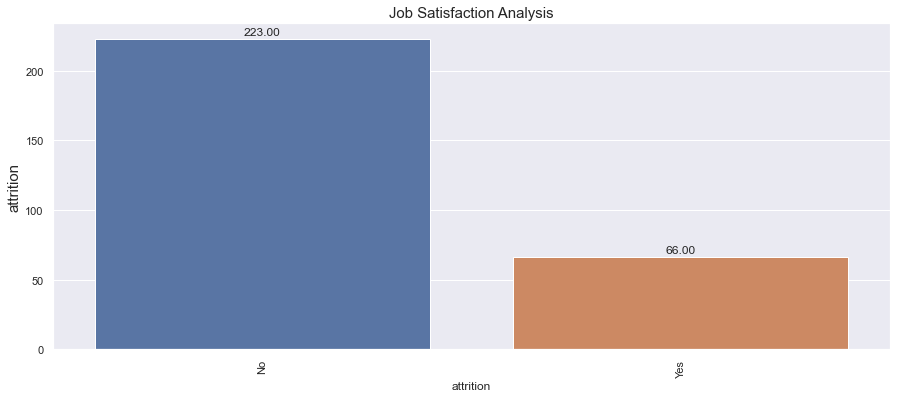

In [36]:
aux = df4[df4["job_satisfaction1"]=="ruim"]

count_plot_rot("attrition", aux, "Job Satisfaction Analysis")

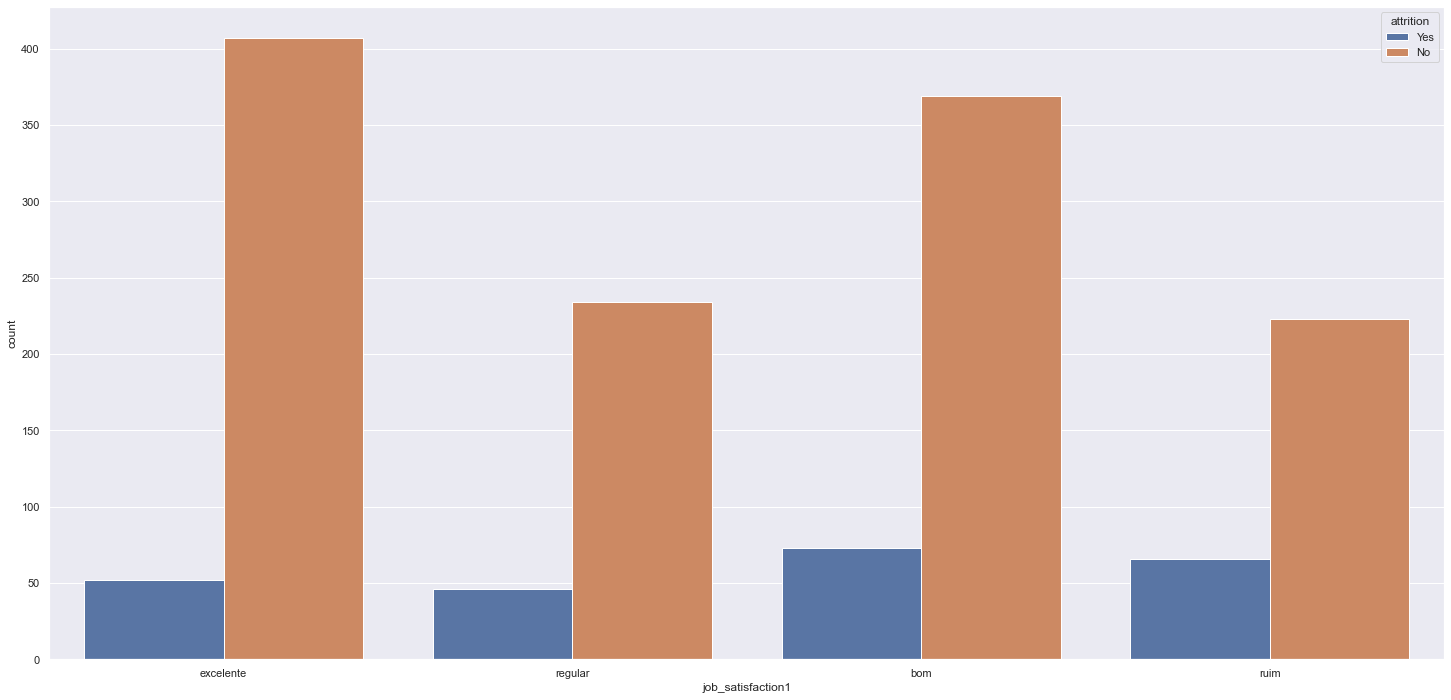

In [37]:
sns.countplot(x="job_satisfaction1", hue="attrition", data=df4);

Não temos muita correlação entre o colaborador sair da empreas e ter uma satisfação ruim de trabalaho

### H6. Viagem a trabalho muito frequentemente está ligado com "job satisfaction"

**FALSO**

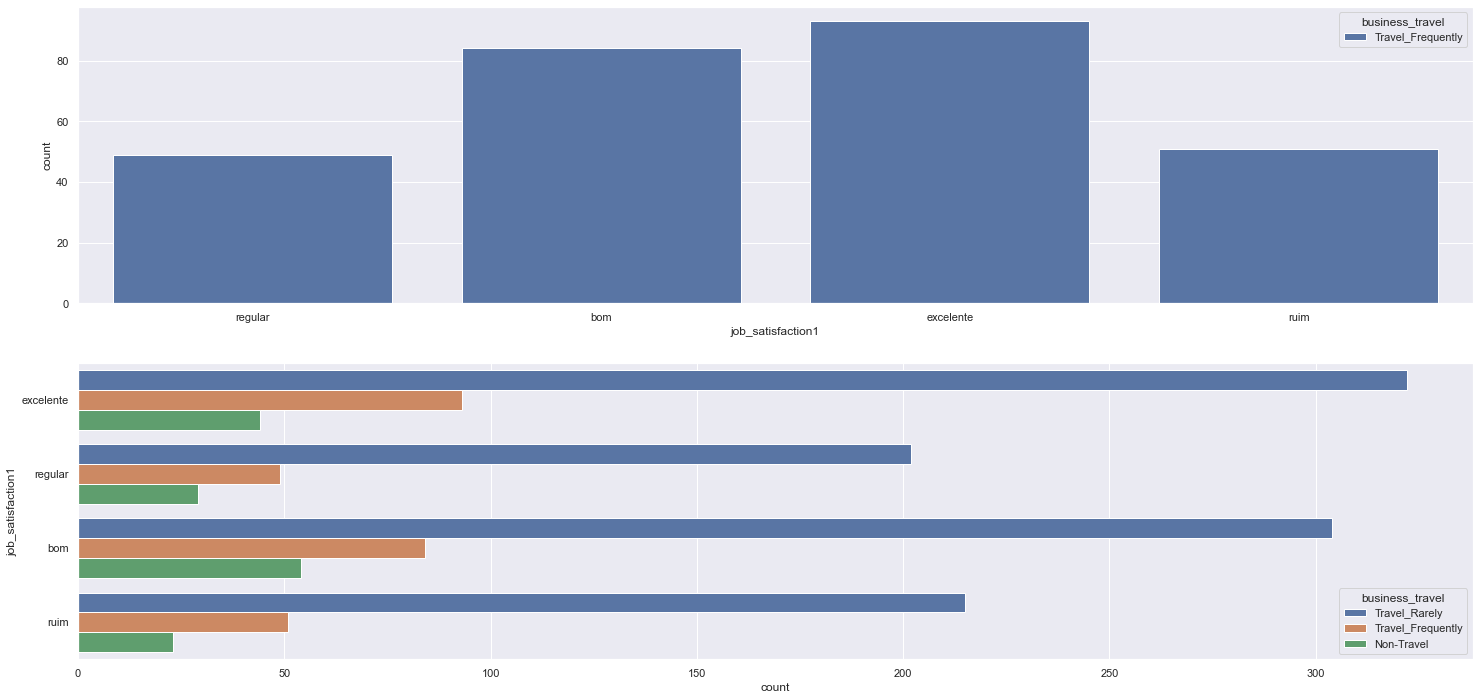

In [38]:
aux = df4[df4["business_travel"]=="Travel_Frequently"]

plt.subplot(2, 1, 1)
sns.countplot(x="job_satisfaction1", hue="business_travel", data=aux);


plt.subplot(2, 1, 2)
sns.countplot(y='job_satisfaction1', hue='business_travel', data=df4);

### H7. A maioria dos desligamentos estão ligados a educação - MBA e Doutorado

**DADOS INSUFICIENETS NÃO TEMOS INFORMAÇÕES DE MBA e DOUTORADO**

### H8. Mais do que 50% dos desligamentos são de Técnico

**FALSO**. Porém temos uma dificuldade a nossa maior dificuldade de retenção é de Human Resources, e a segunda maior é de Técnicos 

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


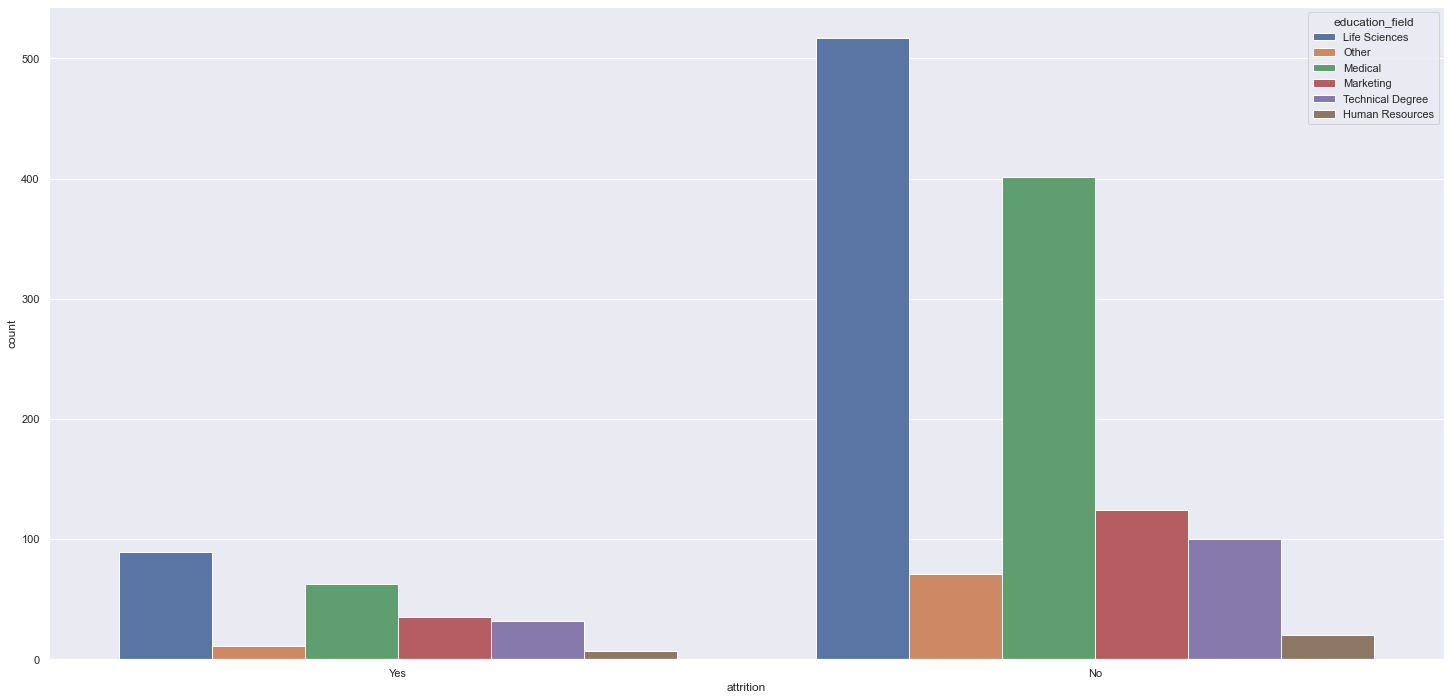

In [39]:
sns.countplot("attrition", hue="education_field", data=df4);

###  H9. Mais do que 50% dos diretores são homens

**VERDADEIRO** 53% de homens 

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


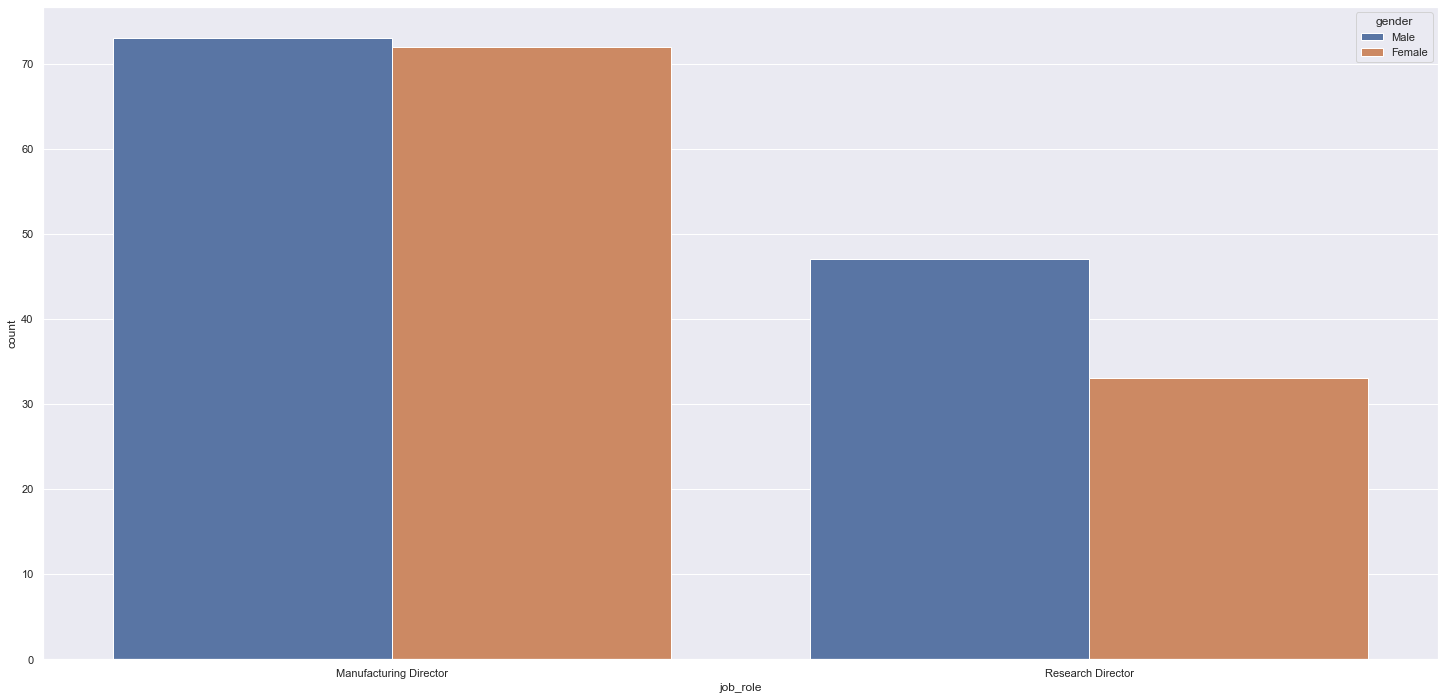

In [40]:
aux = df4[(df4["job_role"]=="Research Director") | (df4["job_role"]== "Manufacturing Director")]

sns.countplot("job_role", hue="gender", data=aux);

In [41]:
aux["gender"].value_counts(normalize=True)

Male      0.533333
Female    0.466667
Name: gender, dtype: float64

### H10. Os desligamentos de mulheres são maiories do que os desligamentos de homens quando comparado com a quantidade de ativos de ambos

**FALSO** Enquanto do masculino deu 20% o feminino deu 17%

In [42]:
aux1 = df4[df4["attrition"]=="Yes"]
aux2 = df4[df4["attrition"]=="No"]

ativos = aux1["gender"].value_counts()
print(f"Desligados \n{ativos}")

print("")
print("====================")
print("")

desligados = aux2["gender"].value_counts()
print(f"Ativos \n{desligados}")

Desligados 
Male      150
Female     87
Name: gender, dtype: int64


Ativos 
Male      732
Female    501
Name: gender, dtype: int64


In [43]:
print(f"turnover masculino {np.around(ativos[0]/desligados[0],2)}, turnover feminino {np.around(ativos[1]/desligados[1],2)}")

turnover masculino 0.2, turnover feminino 0.17


### H11. Colaboradores que trabalharam em mais de 4 até 9 empresas continuam mais ativos do que os colaboradores que trabalharam em 1 até 3. 

**VERDADEIRO**      ALTA RELEVÂNCIA 

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


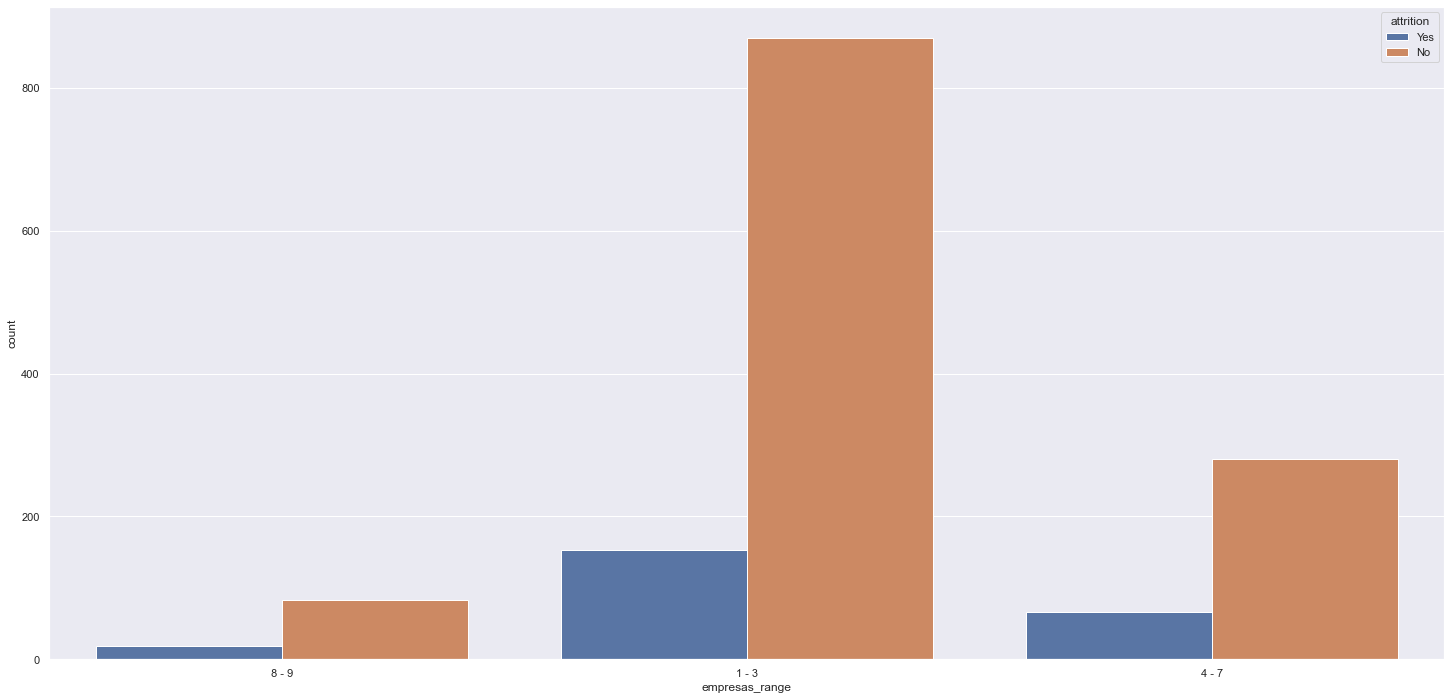

In [44]:
sns.countplot("empresas_range", hue="attrition", data=df4);

### H12. Cargos executivo tem mais alta performance do que Técnicos

**INCONCLUSIVO** O cargo: "Research Director" tem o menor range de performance. O Menor coeficiente está em "Sales Executive"

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


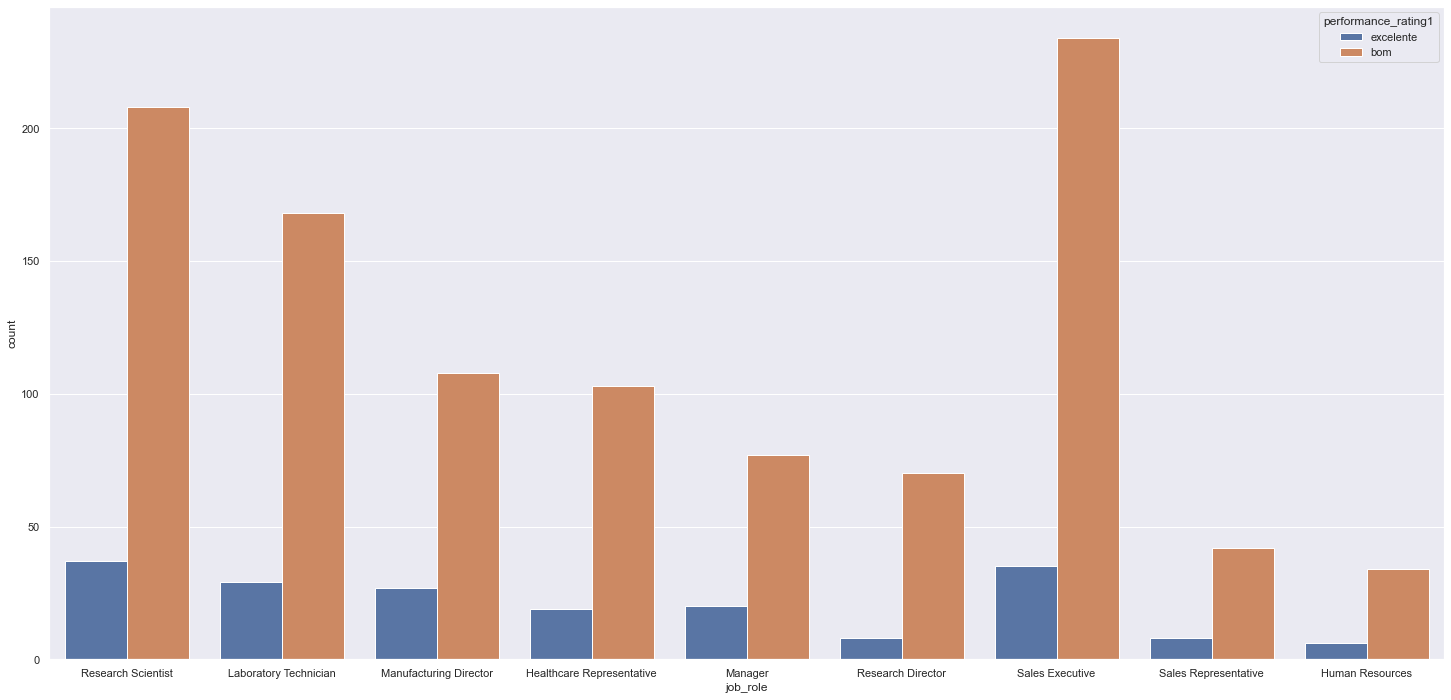

In [45]:
aux = df4[df4["attrition"]=="No"]

sns.countplot("job_role", hue="performance_rating1", data=aux);

### H13. Temos mais alta performance na empresa em ativos do que nos desligados

**VERDADEIRO** Porém a maior parcela de perfomance "BOM" está ativa na empresa

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


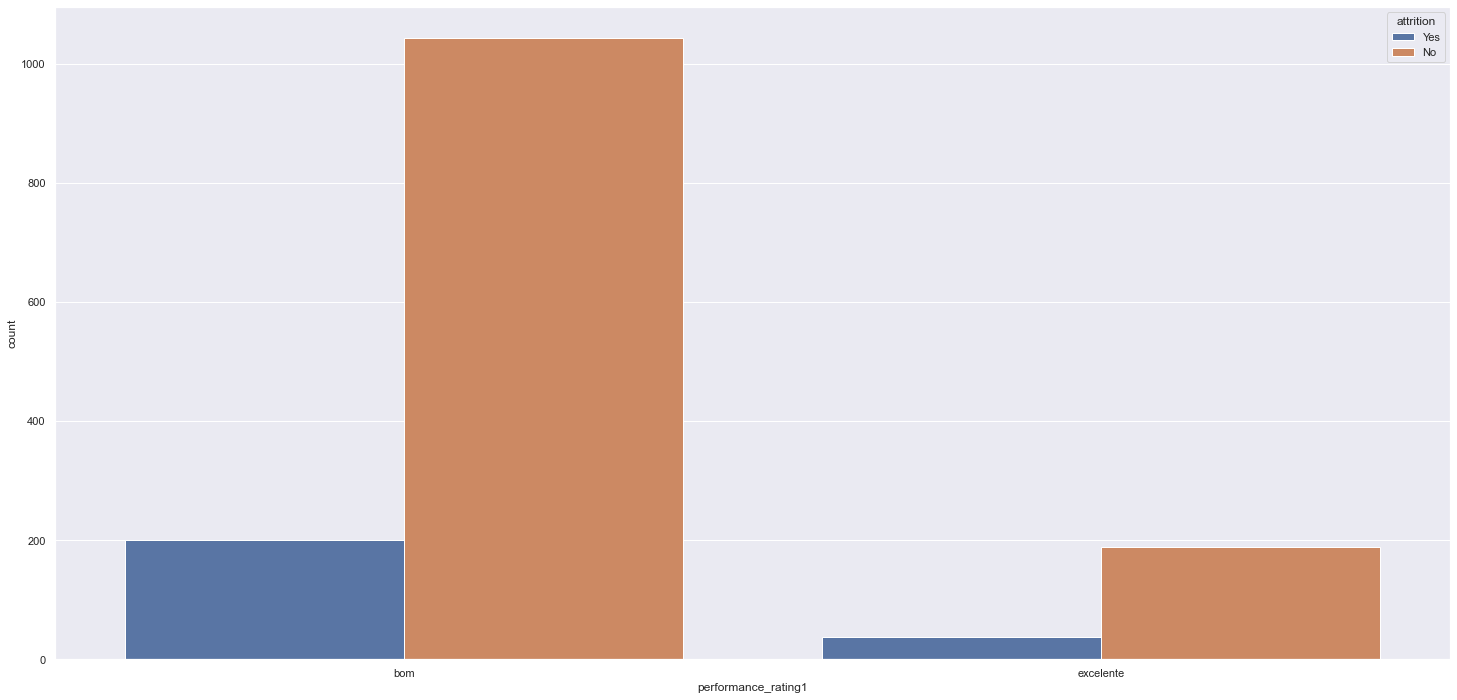

In [46]:
sns.countplot("performance_rating1", hue="attrition", data=df4);

### H14. Quando a distância é a maior possível temos maior desligamento do que quando a distância é a menor possível

**FALSO**

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


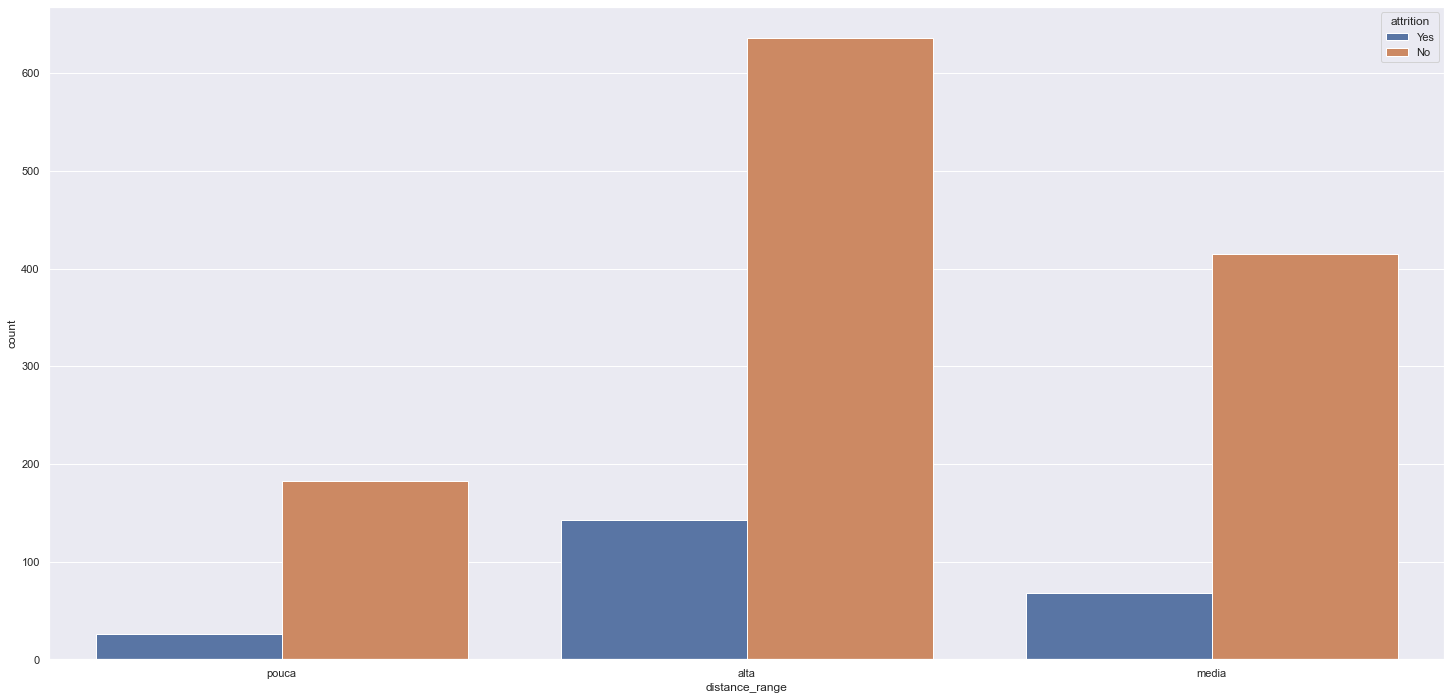

In [47]:
sns.countplot('distance_range', hue='attrition', data=df4);

### H15. Nossos maiores desligamentos estão em funções que tem pouca % de stock option

**VERDADEIRO** Porém os dados nos falam que o mercado está muito aquecido para quem tem um alto nível de Stock Option - tem um cargo mais alto

In [49]:
aux1 = df4[df4["attrition"]=="Yes"]
aux2 = df4[df4["attrition"]=="No"]

ativos = aux1["rv_range"].value_counts()
print(f"Desligados \n{ativos}")

print("")
print("====================")
print("")

desligados = aux2["rv_range"].value_counts()
print(f"Ativos \n{desligados}")

Desligados 
nao tem    154
pouca       56
alta        15
media       12
Name: rv_range, dtype: int64


Ativos 
pouca      540
nao tem    477
media      146
alta        70
Name: rv_range, dtype: int64


In [54]:
print(f"""Turnover: não tem -  {np.around(ativos[0]/desligados[1],2)}, pouca - {np.around(ativos[2]/desligados[1],2)}, media - {np.around(ativos[3]/desligados[2],2)}, alta - {np.around(ativos[2]/desligados[3],2)}""")

Turnover: não tem -  0.32, pouca - 0.03, media - 0.08, alta - 0.21


### H16. Temos mais desligados em Staff do que em Marketing

**INCONCLUSIVO** Não temos Staff nem Marketing nos dados

In [58]:
df4.department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: department, dtype: int64

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


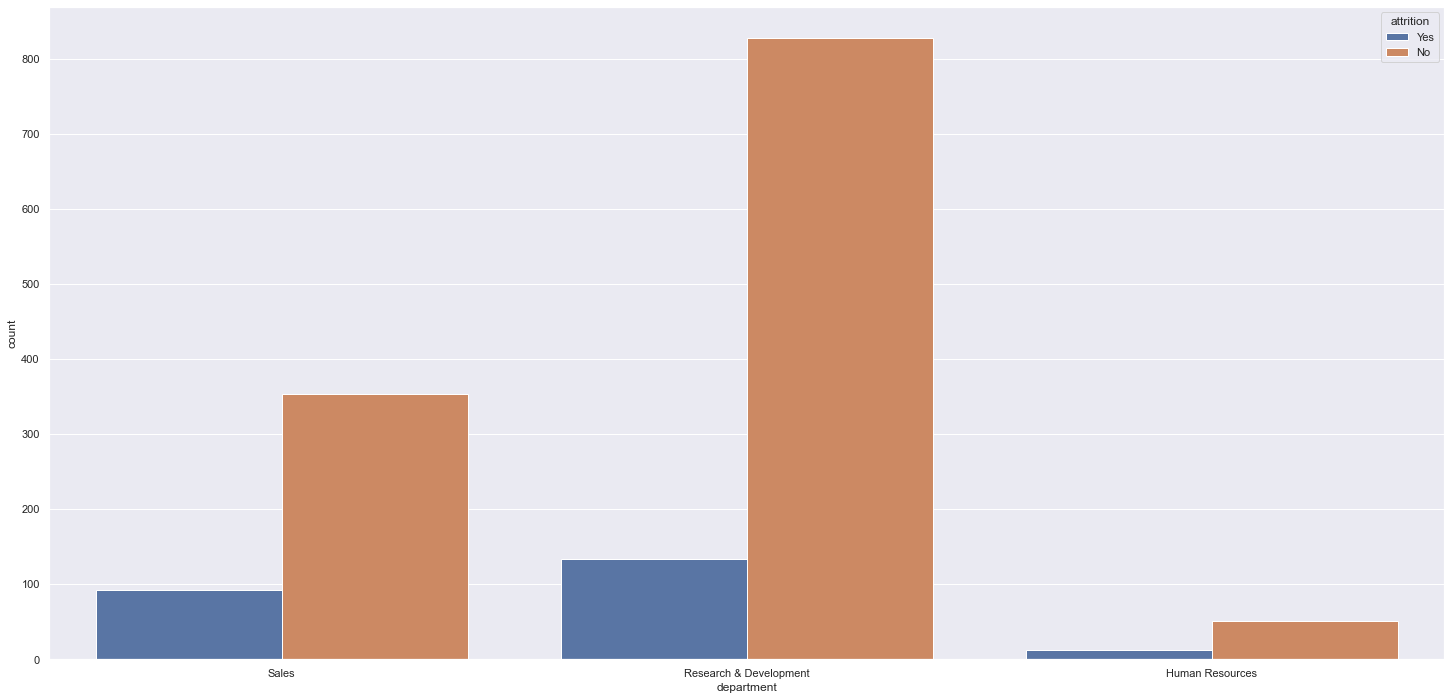

In [57]:
aux1 = df4[df4["attrition"]=="Yes"]
aux2 = df4[df4["attrition"]=="No"]

sns.countplot('department', hue='attrition', data=df4);

### H17. Anos no mesmo cargo tem mais desligamentos do que colaboradores com menos anos 

**FALSO** É ao contrário colaboradores com menos anos no cargo tem mais desligamento

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


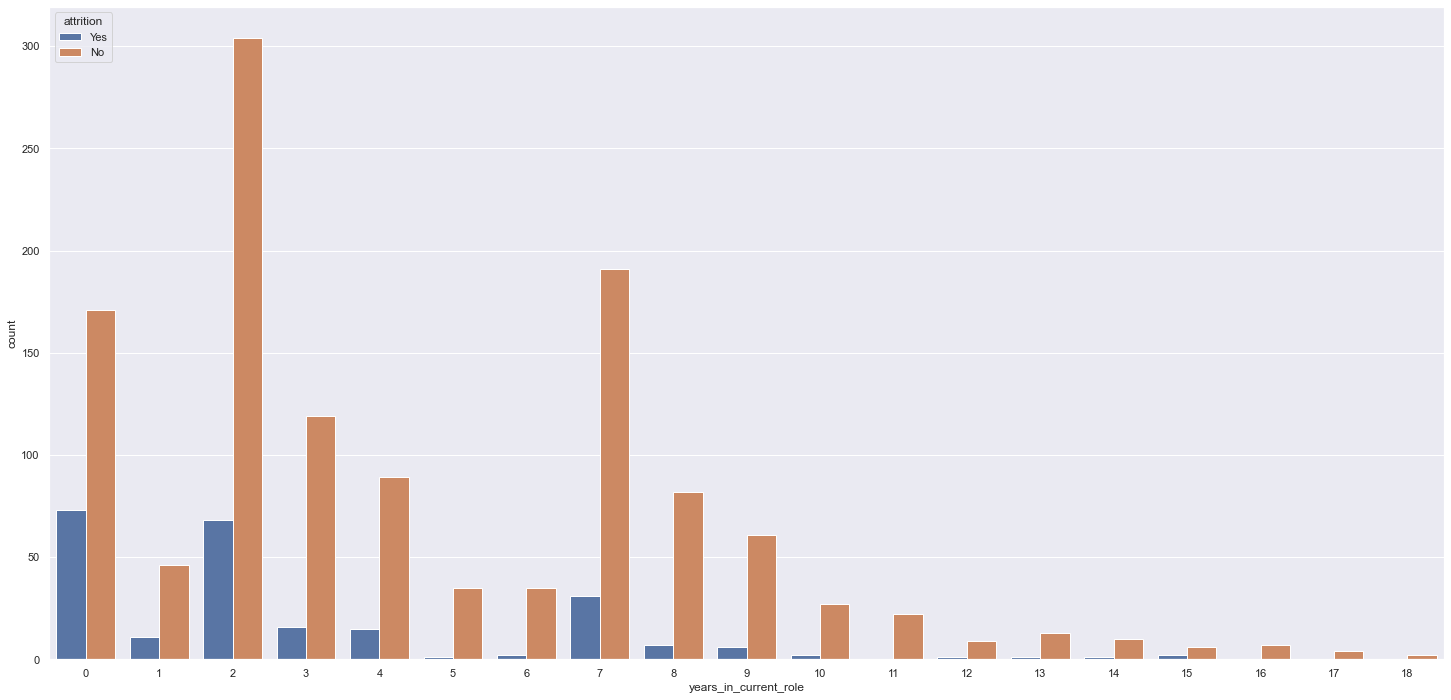

In [63]:
sns.countplot("years_in_current_role", hue="attrition", data=df4);

### H18. Menos de 6 anos trabalhados tem mais desligamentos do que os com mais de 6 anos 

**VERDADEIRO**

C:\Users\guisg\anaconda3\envs\pythonProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


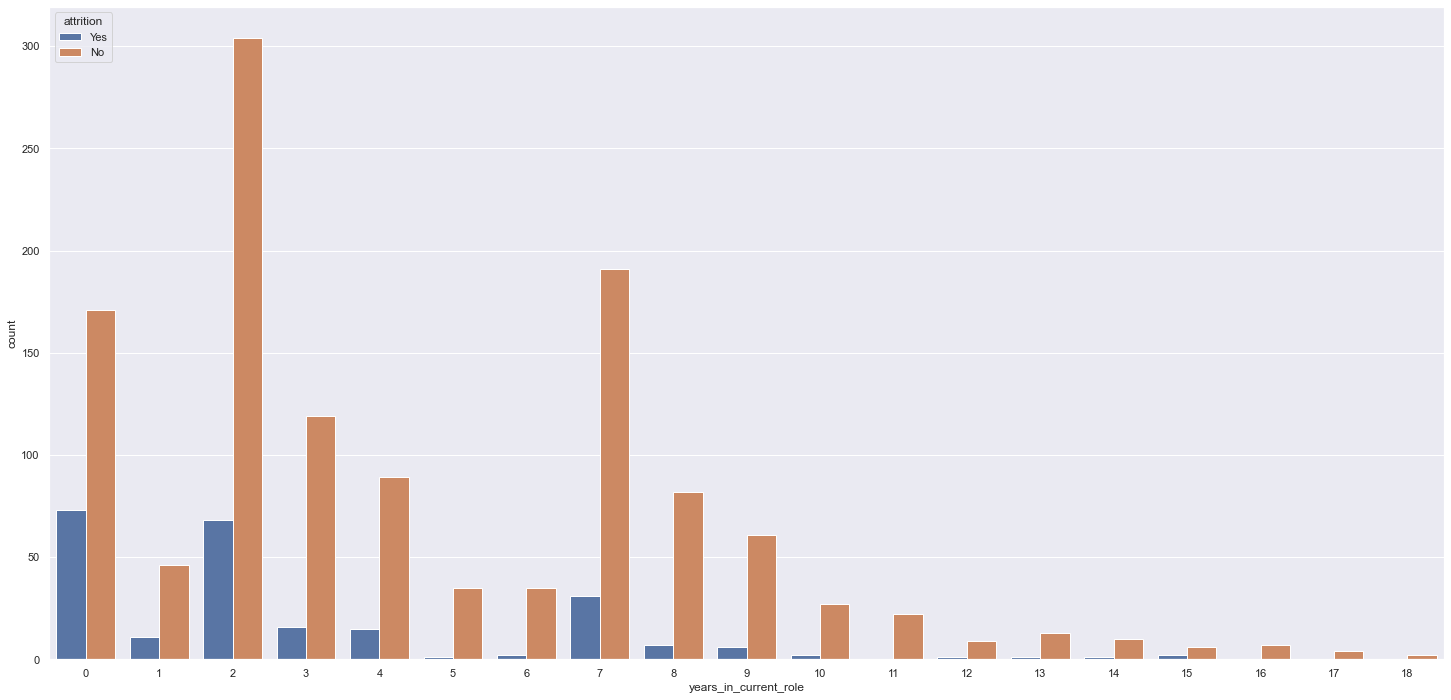

In [64]:
sns.countplot("years_in_current_role", hue="attrition", data=df4);

### Lista Final

In [74]:
print("""==================================================
    H1 - VERDADEIRO - ALTA \n
    H2 - VERDADEIRO - BAIXA \n
    H3 - INCONCLUSIVO \n
    H4 - FALSO      - MÉDIA \n 
    H5 - FALSO      - MÉDIA \n 
    H6 - FALSO      - MÉDIA \n 
    H7 - INCONCLUSIVO \n
    H8 - FALSO      - MÉDIA \n 
    H9 - VERDADEIRO - ALTA \n 
    H10 - VERDADEIRO - MÉDIA \n 
    H11 - VERDADEIRO - ALTA \n 
    H12 - INCONCLUSIVO \n
    H13 - VERDADEIRO - BAIXA \n
    H14 - VERDADEIRO - BAIXA \n
    H15 - VERDADEIRO - ALTA \n
    H16 - INCONCLUSIVO \n
    H17 - FALSO      - ALTA \n
    H17 - VERDADEIRO - ALTA \n""")

    H1 - VERDADEIRO - ALTA 

    H2 - VERDADEIRO - BAIXA 

    H3 - INCONCLUSIVO 

    H4 - FALSO      - MÉDIA 
 
    H5 - FALSO      - MÉDIA 
 
    H6 - FALSO      - MÉDIA 
 
    H7 - INCONCLUSIVO 

    H8 - FALSO      - MÉDIA 
 
    H9 - VERDADEIRO - ALTA 
 
    H10 - VERDADEIRO - MÉDIA 
 
    H11 - VERDADEIRO - ALTA 
 
    H12 - INCONCLUSIVO 

    H13 - VERDADEIRO - BAIXA 

    H14 - VERDADEIRO - BAIXA 

    H15 - VERDADEIRO - ALTA 

    H16 - INCONCLUSIVO 

    H17 - FALSO      - ALTA 

    H17 - VERDADEIRO - ALTA 



## 4.3 Multivariate Analysis

### 4.3.1 Numerical Attributes

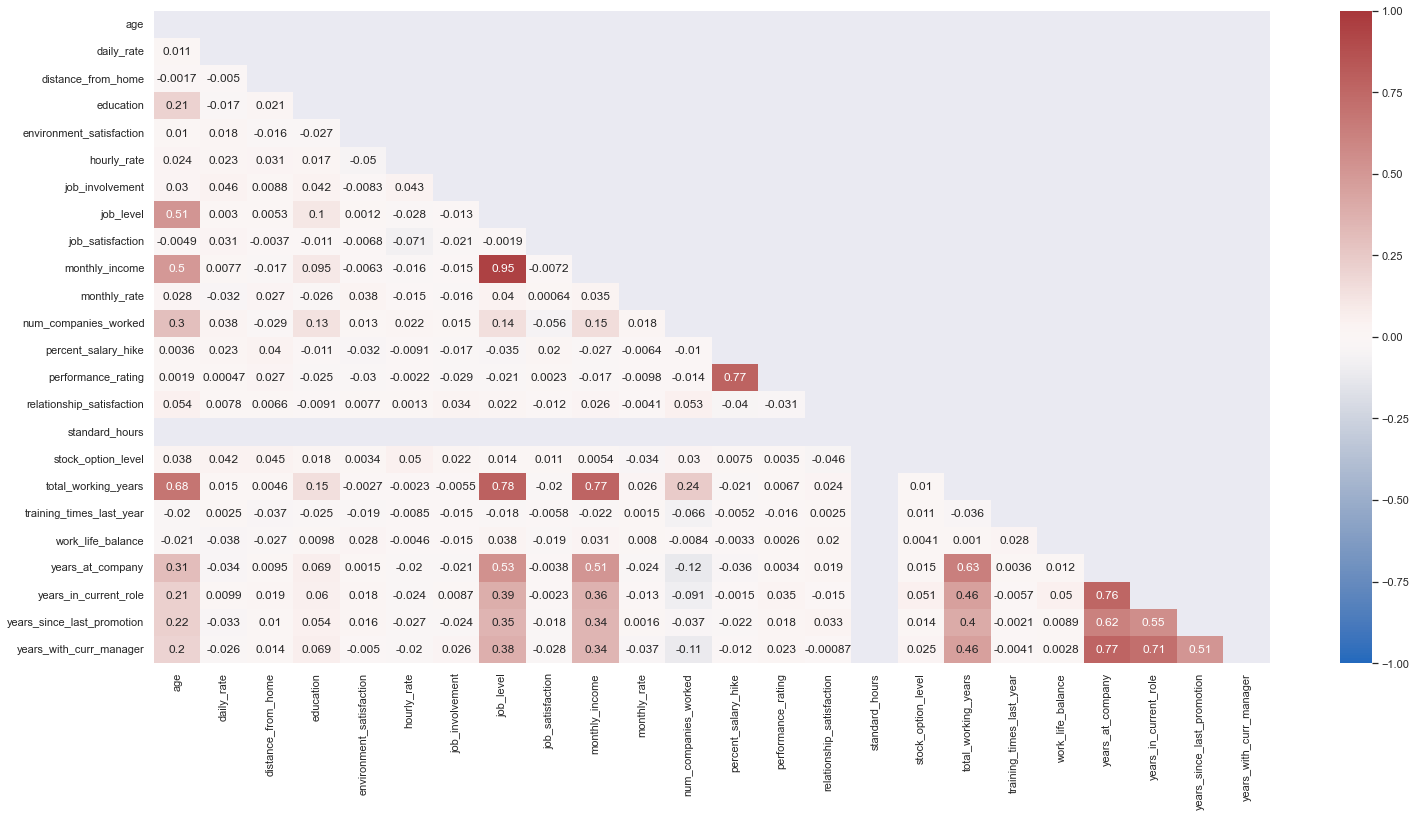

In [65]:
aux1 = df4.select_dtypes(exclude='object')
corr = aux1.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("dark"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, mask=mask, center=0, cmap="vlag");

### 4.3.2 Categorical Attributes

In [70]:
aux1 = df4.select_dtypes(include="object") 

corr_dict = {}

for column in aux1.columns.tolist():
    corr_dict[column] = {}
    
    for column2 in aux1.columns.tolist():
        corr_dict[column][column2] = calcCramerV(aux1[column], aux1[column2])
        
corr = pd.DataFrame(corr_dict)

C:\Users\guisg\AppData\Local\Temp/ipykernel_22524/2844319524.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))


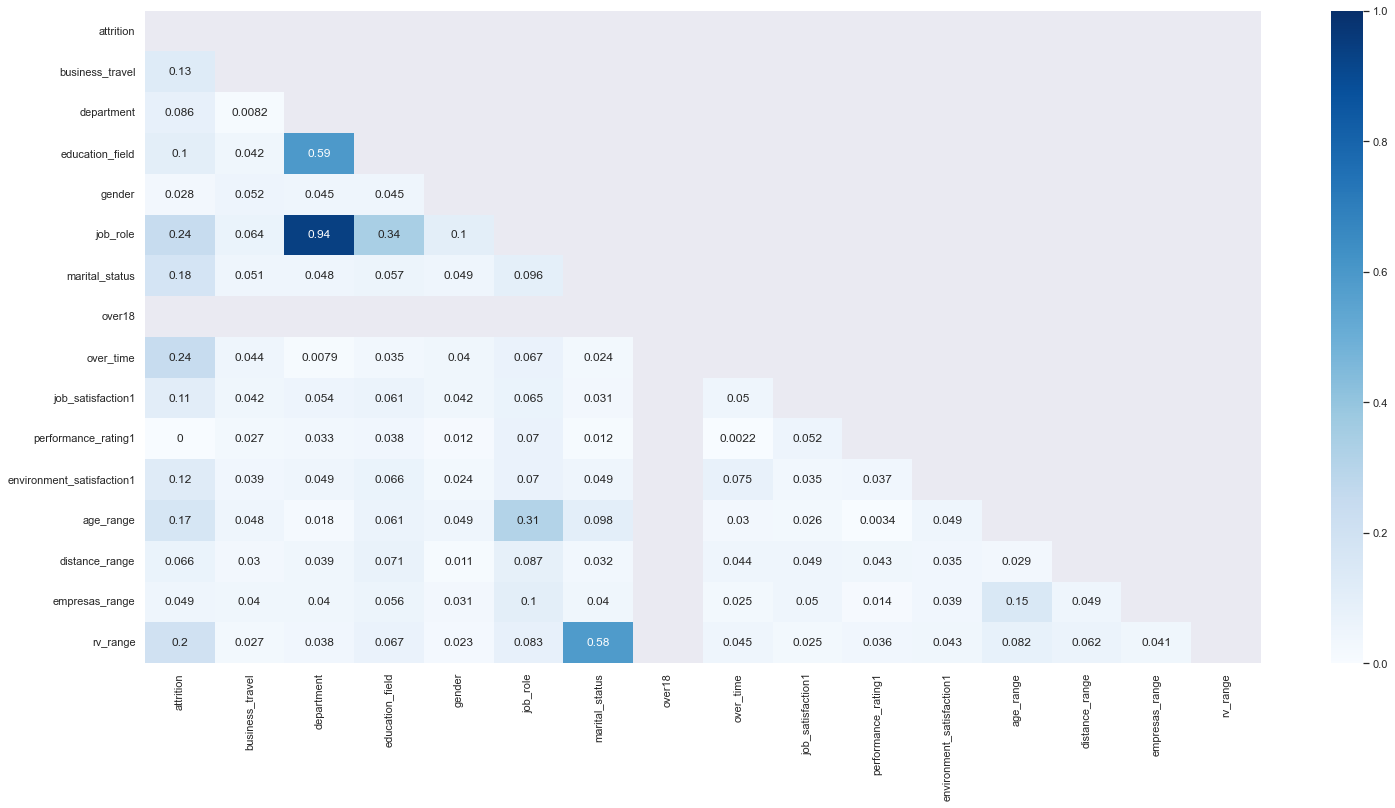

In [71]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("dark"):
    f, ax = plt.subplots()
    ax = sns.heatmap(corr, annot=True, vmin=0, vmax=1, mask=mask, cmap="Blues")

# 5. Data Preparation